In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
# Cau 1
df_cn = pd.read_csv('sinh_vien_CN.csv')
df_to = pd.read_csv('sinh_vien_TO.csv')
df_vl = pd.read_csv('sinh_vien_VL.csv')

df = pd.concat([df_cn,df_to,df_vl])

In [3]:
# Cau 2
print('Số cột của df là:', df.shape[1])
print('Số dòng của df là:', df.shape[0])
print('\nDữ liệu head của df là:\n', df.head())
print('\nDữ liệu tail của df là:\n', df.tail())

Số cột của df là: 10
Số dòng của df là: 1000

Dữ liệu head của df là:
     masv              ho    ten  gioitinh             ngaysinh  \
0  C0001     Khương Thảo   Loan     False  1999-01-04 00:00:00   
1  C0002       Đặng Bạch   Ngọc      True  1999-11-11 00:00:00   
2  C0003   Phạm Văn Minh  Thiện      True  1999-11-23 00:00:00   
3  C0004  Đinh Thị Thanh   Dung     False  1999-01-19 00:00:00   
4  C0005       Trần Mạnh  Thiện      True  1999-08-19 00:00:00   

                email     didong          cmnd  hocbong makh  
0    ktloan@gmail.com  987314518  586900775484  2000000   CN  
1    dbngoc@gmail.com  987587327  274387352269        0   CN  
2  pvmthien@gmail.com  987858734  835772714136        0   CN  
3   dttdung@gmail.com  987508413  373064334392  1000000   CN  
4   tmthien@gmail.com  987579776  233384596844  1000000   CN  

Dữ liệu tail của df là:
       masv           ho    ten  gioitinh             ngaysinh  \
395  V0996    Trần Mạnh  Thăng      True  1999-06-21 00:00:00  

In [4]:
# Cau 3
df.index = np.arange(df.shape[0])
df.tail()

,masv,ho,ten,gioitinh,ngaysinh,email,didong,cmnd,hocbong,makh
995,V0996,Trần Mạnh,Thăng,True,1999-06-21 00:00:00,tmthang@gmail.com,987250062,768656897616,2000000,VL
996,V0997,Trần Vĩnh,Thiện,True,1999-07-23 00:00:00,tvthien@gmail.com,987716502,468267857113,3000000,VL
997,V0998,Khương Thảo,Hạnh,False,1999-08-16 00:00:00,kthanh@gmail.com,913696608,702859343545,0,VL
998,V0999,Đinh Ngọc,Ngọc,True,1999-05-25 00:00:00,dnngoc@gmail.com,913689521,187831202224,3000000,VL
999,V1000,Lý Mạnh,Bảo,True,1999-06-03 00:00:00,lmbao@gmail.com,987656186,865173188581,0,VL


In [5]:
# Cau 4
df_ket_qua = pd.read_csv('ket_qua.csv')
df_ket_qua.head()

,masv,mamh,diem
0,C0001,CSD1,7.0
1,C0001,CSD2,6.0
2,C0001,CTDL,9.0
3,C0001,KTLT,5.5
4,C0001,LQL1,7.0


In [6]:
# Cau 5
df_dtb = df_ket_qua.groupby('masv', as_index=False)['diem'].mean()
df_dtb.head()
df_dtb.tail()

,masv,diem
995,V0996,6.25
996,V0997,7.50
997,V0998,8.15
998,V0999,7.30
999,V1000,7.55


In [7]:
# Cau 6
df = pd.merge(df, df_dtb, on='masv')
df.tail()

,masv,ho,ten,gioitinh,ngaysinh,email,didong,cmnd,hocbong,makh,diem
995,V0996,Trần Mạnh,Thăng,True,1999-06-21 00:00:00,tmthang@gmail.com,987250062,768656897616,2000000,VL,6.25
996,V0997,Trần Vĩnh,Thiện,True,1999-07-23 00:00:00,tvthien@gmail.com,987716502,468267857113,3000000,VL,7.50
997,V0998,Khương Thảo,Hạnh,False,1999-08-16 00:00:00,kthanh@gmail.com,913696608,702859343545,0,VL,8.15
998,V0999,Đinh Ngọc,Ngọc,True,1999-05-25 00:00:00,dnngoc@gmail.com,913689521,187831202224,3000000,VL,7.30
999,V1000,Lý Mạnh,Bảo,True,1999-06-03 00:00:00,lmbao@gmail.com,987656186,865173188581,0,VL,7.55


In [8]:
# Cau 7
df_1 = df[(df['makh']=='CN') & (df['diem']>8)]
df_1

,masv,ho,ten,gioitinh,ngaysinh,email,didong,cmnd,hocbong,makh,diem
43,C0044,Bạch Thị,Thúy,False,1999-11-09 00:00:00,btthuy@gmail.com,987681542,483340458851,0,CN,8.05
51,C0052,Lê Thị Thảo,Ly,False,1999-02-14 00:00:00,lttly@gmail.com,168434476,874368763621,1000000,CN,8.55
70,C0071,Khương Thanh,Thanh,False,1999-03-13 00:00:00,ktthanh@gmail.com,168852812,942543336435,0,CN,8.30
79,C0080,Bạch Thanh,Thanh,False,1999-01-04 00:00:00,btthanh@gmail.com,913843497,169614465950,3000000,CN,8.30
108,C0109,Bạch Thị,Hoa,False,1999-10-14 00:00:00,bthoa@gmail.com,913174720,347889227616,1000000,CN,8.20
139,C0140,Đàm Vĩnh,Thăng,True,1999-12-02 00:00:00,dvthang@gmail.com,913063278,681253422515,0,CN,8.25
153,C0154,Cao Văn Minh,Bảo,True,1999-05-11 00:00:00,cvmbao@gmail.com,913598140,530460808272,3000000,CN,8.60
159,C0160,Phạm Thảo,Mai,False,1999-12-19 00:00:00,ptmai@gmail.com,987316732,791319761675,0,CN,8.25
197,C0198,Lê Văn Minh,Thiện,True,1999-06-27 00:00:00,lvmthien@gmail.com,913495078,163946544228,2000000,CN,8.10
215,C0216,Đinh Thanh,Thanh,False,1999-04-09 00:00:00,dtthanh@gmail.com,987705817,531437738832,1000000,CN,8.40


In [9]:
# Cau 8
df_2 = df_1.sort_values(by=['ten','diem'], ascending=[True,False])
df_2

,masv,ho,ten,gioitinh,ngaysinh,email,didong,cmnd,hocbong,makh,diem
153,C0154,Cao Văn Minh,Bảo,True,1999-05-11 00:00:00,cvmbao@gmail.com,913598140,530460808272,3000000,CN,8.60
293,C0294,Phạm Nam,Bảo,True,1999-12-30 00:00:00,pnbao@gmail.com,987586638,968772828515,1000000,CN,8.05
435,C0436,Lâm Thị Thanh,Dung,False,1999-11-24 00:00:00,lttdung@gmail.com,168753165,971746450069,2000000,CN,8.20
271,C0272,Thái Nam,Dũng,True,1999-08-12 00:00:00,tndung@gmail.com,913486853,701413814886,0,CN,8.20
108,C0109,Bạch Thị,Hoa,False,1999-10-14 00:00:00,bthoa@gmail.com,913174720,347889227616,1000000,CN,8.20
356,C0357,Lê Thị,Hoa,False,1999-08-24 00:00:00,lthoa@gmail.com,168168028,407376423068,3000000,CN,8.10
456,C0457,Bạch Thị Thanh,Hạnh,False,1999-05-10 00:00:00,btthanh@gmail.com,168268210,645933502115,1000000,CN,8.05
51,C0052,Lê Thị Thảo,Ly,False,1999-02-14 00:00:00,lttly@gmail.com,168434476,874368763621,1000000,CN,8.55
354,C0355,Văn Thị,Mai,False,1999-11-10 00:00:00,vtmai@gmail.com,987327541,855354458643,0,CN,8.75
159,C0160,Phạm Thảo,Mai,False,1999-12-19 00:00:00,ptmai@gmail.com,987316732,791319761675,0,CN,8.25


In [10]:
# Cau 9
df_3 = df[(df['gioitinh']==True) & (df['hocbong']==0)]
df_3

,masv,ho,ten,gioitinh,ngaysinh,email,didong,cmnd,hocbong,makh,diem
1,C0002,Đặng Bạch,Ngọc,True,1999-11-11 00:00:00,dbngoc@gmail.com,987587327,274387352269,0,CN,7.20
2,C0003,Phạm Văn Minh,Thiện,True,1999-11-23 00:00:00,pvmthien@gmail.com,987858734,835772714136,0,CN,7.70
25,C0026,Lâm Vĩnh,Hiệu,True,1999-07-26 00:00:00,lvhieu@gmail.com,987880747,304474621035,0,CN,6.80
26,C0027,Đinh Thanh,Mỹ,True,1999-11-26 00:00:00,dtmy@gmail.com,913774531,461863655265,0,CN,7.20
27,C0028,Lâm Nam,Sinh,True,1999-07-24 00:00:00,lnsinh@gmail.com,168613393,747111658838,0,CN,6.35
34,C0035,Văn Phú,Tâm,True,1999-02-07 00:00:00,vptam@gmail.com,913852739,445786618758,0,CN,7.40
37,C0038,Mã Bạch,Mỹ,True,1999-07-18 00:00:00,mbmy@gmail.com,913563968,553672304485,0,CN,6.95
38,C0039,Cao Mạnh,Thiện,True,1999-03-20 00:00:00,cmthien@gmail.com,987842511,793370470912,0,CN,6.65
45,C0046,Bạch Nam,Huy,True,1999-05-14 00:00:00,bnhuy@gmail.com,913533371,252192066524,0,CN,7.30
53,C0054,Lý Vĩnh,Sinh,True,1999-05-25 00:00:00,lvsinh@gmail.com,913134764,145528667746,0,CN,6.60


In [11]:
# Cau 10
df.groupby('makh',as_index=False)['hocbong'].sum()

,makh,hocbong
0,CN,711000000
1,TO,140000000
2,VL,616000000


In [12]:
# Cau 11
df.groupby('makh',as_index=False)['hocbong'].agg(['sum','max','min','mean']).reset_index()

,makh,sum,max,min,mean
0,CN,711000000,3000000,0,1422000
1,TO,140000000,3000000,0,1400000
2,VL,616000000,3000000,0,1540000


In [13]:
# Cau 12
df.groupby('makh',as_index=False)['diem'].agg(['count','max','min','mean']).reset_index()

,makh,count,max,min,mean
0,CN,500,8.75,5.50,7.2188
1,TO,100,8.35,6.10,7.2990
2,VL,400,8.65,5.15,7.1875


In [14]:
# Cau 13: Diem lon nhat
df[df['diem'] == df['diem'].max()]

,masv,ho,ten,gioitinh,ngaysinh,email,didong,cmnd,hocbong,makh,diem
354,C0355,Văn Thị,Mai,False,1999-11-10 00:00:00,vtmai@gmail.com,987327541,855354458643,0,CN,8.75


In [15]:
# Cau 13: Diem nho nhat
df[df['diem'] == df['diem'].min()]

,masv,ho,ten,gioitinh,ngaysinh,email,didong,cmnd,hocbong,makh,diem
832,V0833,Trần Phú,Minh,False,1999-05-24 00:00:00,tpminh@gmail.com,168861731,190672558617,2000000,VL,5.15


In [16]:
# Cau 14
df['ketqua'] = df['diem'].map(lambda x: 'giỏi' if x>=8 else 'khá')
df

,masv,ho,ten,gioitinh,ngaysinh,email,didong,cmnd,hocbong,makh,diem,ketqua
0,C0001,Khương Thảo,Loan,False,1999-01-04 00:00:00,ktloan@gmail.com,987314518,586900775484,2000000,CN,6.50,khá
1,C0002,Đặng Bạch,Ngọc,True,1999-11-11 00:00:00,dbngoc@gmail.com,987587327,274387352269,0,CN,7.20,khá
2,C0003,Phạm Văn Minh,Thiện,True,1999-11-23 00:00:00,pvmthien@gmail.com,987858734,835772714136,0,CN,7.70,khá
3,C0004,Đinh Thị Thanh,Dung,False,1999-01-19 00:00:00,dttdung@gmail.com,987508413,373064334392,1000000,CN,6.90,khá
4,C0005,Trần Mạnh,Thiện,True,1999-08-19 00:00:00,tmthien@gmail.com,987579776,233384596844,1000000,CN,7.70,khá
5,C0006,Trần Văn Minh,Hiệu,True,1999-12-12 00:00:00,tvmhieu@gmail.com,168595875,65746412487,1000000,CN,7.80,khá
6,C0007,Lê Thị,Mai,False,1999-09-13 00:00:00,ltmai@gmail.com,168116548,123537817134,2000000,CN,7.65,khá
7,C0008,Bạch Vĩnh,Tuấn,True,1999-06-08 00:00:00,bvtuan@gmail.com,987682839,643872714468,1000000,CN,7.25,khá
8,C0009,Thái Thị Thanh,Nhung,False,1999-07-18 00:00:00,tttnhung@gmail.com,913555665,943138244683,0,CN,7.35,khá
9,C0010,Khương Văn Minh,Trọng,True,1999-10-01 00:00:00,kvmtrong@gmail.com,913557276,548347163939,2000000,CN,7.55,khá


In [17]:
# Cau 15
df_thongke = df[['makh','ketqua','masv']].groupby(['makh','ketqua'],as_index=False).count()
df_thongke

,makh,ketqua,masv
0,CN,giỏi,39
1,CN,khá,461
2,TO,giỏi,12
3,TO,khá,88
4,VL,giỏi,33
5,VL,khá,367


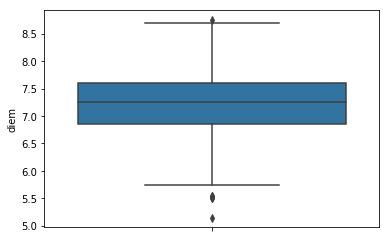

In [18]:
# Cau 16
sb.boxplot(y='diem',data=df)

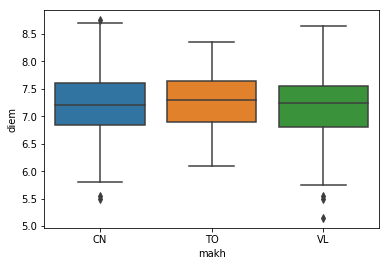

In [19]:
# Cau 17
sb.boxplot(x='makh',y='diem',data=df)

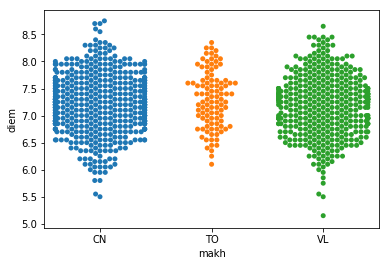

In [20]:
# Cau 18
sb.swarmplot(x='makh',y='diem',data=df)

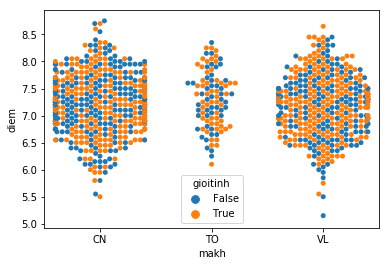

In [21]:
# Cau 19
sb.swarmplot(x='makh',y='diem',data=df,hue='gioitinh')

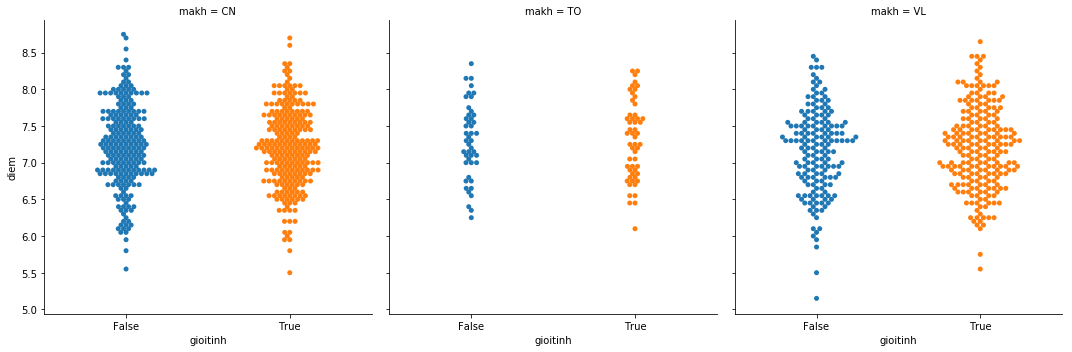

In [22]:
# Cau 20
sb.catplot(x='gioitinh',y='diem',data=df,kind='swarm',col='makh')

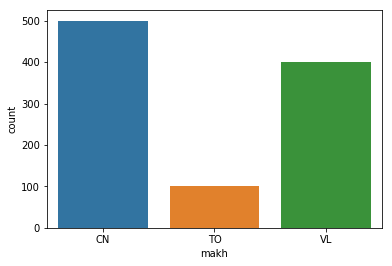

In [23]:
# Cau 21
sb.countplot(x='makh',data=df)

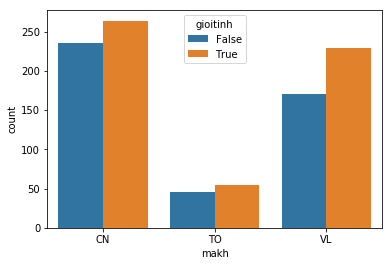

In [24]:
# Cau 22
sb.countplot(x='makh',data=df,hue='gioitinh')

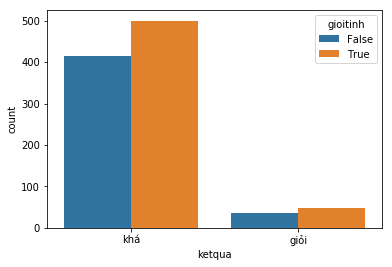

In [25]:
# Cau 23
sb.countplot(x='ketqua',data=df,hue='gioitinh')

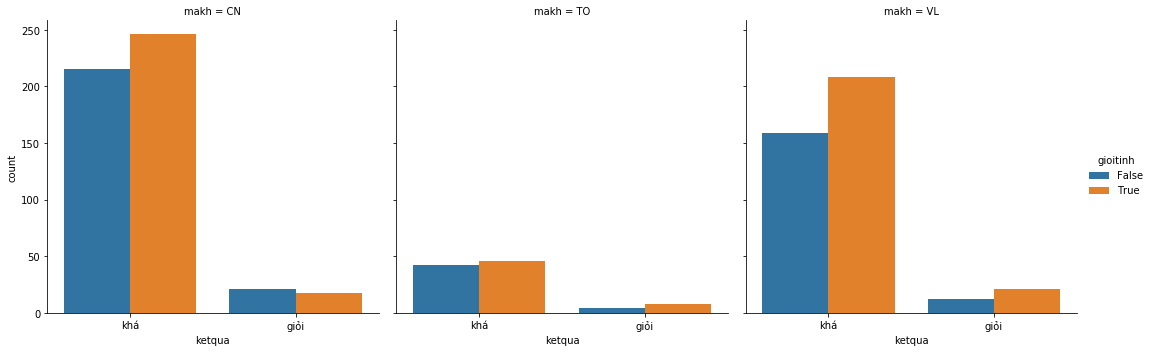

In [26]:
# Cau 24
sb.catplot(x='ketqua',data=df,kind='count',col='makh',hue='gioitinh')

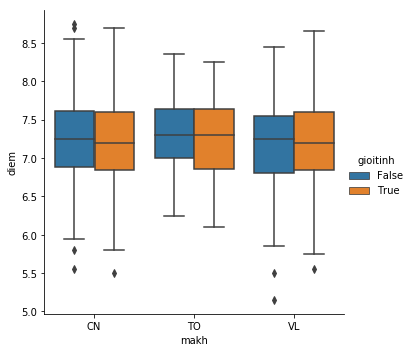

In [27]:
# Cau 25
sb.catplot(x='makh',y='diem',data=df,kind='box',hue='gioitinh')